# Проект о вкусной и здоровой пище
## [DST-33] Restaurant rating prediction

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import re 

import os

# Any results you write to the current directory are saved as output.

from datetime import datetime, timedelta

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

## Списки и функции, которые используются дальше

In [3]:
cities = ['Paris', 'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto', 'Milan', 'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid',
 'Dublin', 'Brussels', 'Zurich', 'Warsaw', 'Budapest', 'Copenhagen', 'Amsterdam', 'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo',
 'Helsinki', 'Edinburgh', 'Geneva', 'Ljubljana', 'Athens', 'Luxembourg', 'Krakow']  

turisty = {'Paris': 16.8, 'Stockholm': 2.6, 'London': 20.7, 'Berlin': 5.8, 'Munich': 4.0, 'Oporto': 2.4, 'Milan': 6.5,
           'Bratislava': 1.6, 'Vienna': 6.3, 'Rome': 9.7, 'Barcelona': 6.7, 'Madrid': 5.5, 'Dublin': 5.2, 'Brussels':3.1, 
           'Zurich': 1,'Warsaw': 2.9, 'Budapest': 4.0, 'Copenhagen': 3.0, 'Amsterdam': 8.5, 'Lyon': 1, 'Hamburg': 2.1, 
           'Lisbon': 3.8,'Prague': 9.0, 'Oslo': 1,  'Helsinki': 1.2 , 'Edinburgh': 1.1, 'Geneva': 1, 'Ljubljana': 0.8, 
           'Athens': 5.1, 'Luxembourg': 0.9, 'Krakow': 2.9}

zhitely = { 'Paris': 2.2, 'Helsinki': 0.63, 'Edinburgh': 0.48, 'London': 9.0, 'Bratislava': 0.42, 'Lisbon': 0.50,
    'Budapest': 0.18, 'Stockholm': 0.79, 'Rome': 2.9, 'Milan': 1.35, 'Munich': 1.47, 'Hamburg': 1.84, 'Prague': 1.31,
    'Vienna': 1.9, 'Dublin': 0.54, 'Barcelona': 1.62, 'Brussels': 0.17, 'Madrid': 3.2, 'Oslo': 0.63, 'Amsterdam': 0.87,
    'Berlin': 3.6, 'Lyon': 0.51, 'Athens': 0.66, 'Warsaw': 1.76, 'Oporto': 0.21, 'Krakow': 0.77, 'Copenhagen': 0.60,
    'Luxembourg': 0.11, 'Zurich': 0.40, 'Geneva': 0.20, 'Ljubljana': 0.28 }
def ceny(stroka):
    if stroka == '$':
        return 1
    if stroka == '$$ - $$$':
        return 2
    if stroka == '$$$$':
        return 3

def tourism(city):
    return turisty[city]
       
def max_Rank(city):
    return slovar_gorodov[city]

def max_Review(city):
    return slovar_gorodov[city]

bad_words = ['bad','avoid','disaster','ripoff','rip off','amful','worst','terrible','horrible','nightmare','poison','rude','rubbish',
            'burnt', 'refund','overprice', 'don\'t', 'racism', 'not great', 'trap', 'over price','disappoint','garbage','unpleasant',
            'poor','skip','soggy','warning','unhygienic', 'hostile','revolting','disgraceful','mediocre']
good_words = ['gem','excellent','yummi','nice','delicous','love','best','wonderful','fantas','enjoylable','tasty','cozy','great food',
             'perfect','very good']
def ploho(stroka):
    a=0
    for slovo in bad_words:
        if slovo in stroka.lower():
            a-=1
    for slovo in good_words:
        if slovo in stroka.lower():
            a+=1
    return a

def spisok_to_str(spisok):
    return str(spisok)[1:-1]

def kuhni_preobr(spisok):
    vozv_spisok = []
    for i in range(len(spisok)):
        if spisok[i] in stroka_kuhon:
            vozv_spisok.append(spisok[i])
        elif 'Ostalnoe' not in spisok:
            vozv_spisok.append('Ostalnoe')
    return vozv_spisok

def sortirovka_restoranov(a):
    if a == 1:
        return 0 # уникальные рестораны
    elif a<5:
        return 1 # мелкие сети
    else:
        return 2 #крупные сети

# DATA

In [4]:
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

df = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана
* Restaurant_id: ID ресторана

In [11]:
df.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
42387,id_1545,Lyon,NaN,1546.0,NaN,13.0,"[['A delicious first meal in Lyon'], ['12/21/2...",/Restaurant_Review-g187265-d5981654-Reviews-Vi...,d5981654,1,4.5
22877,id_2530,Berlin,"['Mediterranean', 'Turkish', 'Vegetarian Frien...",2532.0,$,6.0,"[['Great Turkish Breakfast', 'Cheap, fresh and...",/Restaurant_Review-g187323-d10497827-Reviews-P...,d10497827,1,5.0
41004,id_1961,Lyon,['Mexican'],2007.0,NaN,2.0,"[[], []]",/Restaurant_Review-g1080938-d5808701-Reviews-G...,d5808701,1,4.0
44768,id_648,London,"['European', 'British', 'Vegetarian Friendly',...",649.0,$$$$,1836.0,"[['Totally Unique', 'Lunch Boxing Day sales'],...",/Restaurant_Review-g186338-d5264070-Reviews-Be...,d5264070,1,4.0
31201,id_3674,Rome,"['Brew Pub', 'Bar', 'Delicatessen', 'Pub', 'Wi...",3675.0,$,8.0,"[[], []]",/Restaurant_Review-g187791-d12708319-Reviews-R...,d12708319,1,5.0


In [12]:
df.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Очистка данных


## Обработка NAN 

In [13]:
df['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

Уровень цен по умолчанию сделаем средним, т.к. таких ресторанов больше всего и создадим новый признак: "Уровень цен"

In [14]:
df['Uroven_cen'] = df['Price Range'].fillna('$$ - $$$')
df['Uroven_cen'] = df['Uroven_cen'].replace('', '$$ - $$$')

Если стиль кухни неизвестен, так и назовем "Неизвестное"

In [15]:
df['Cuisine Style'] = df['Cuisine Style'].fillna(" Neizvestnoe ")

In [16]:
df['Number of Reviews'].min()

2.0

Если нет количества отзывов, будем считать, что их 2 - минимальное количество отзывов

In [17]:
df['Number of Reviews'] = df['Number of Reviews'].fillna(2)

In [18]:
df['Reviews'] = df['Reviews'].str.replace("\[]", "04/25/2017") 
# Заменяем пропуски на самое старое значение публикации отзыва
df['Reviews'] = df['Reviews'].fillna("04/25/2017") 

Сделаем признак "Уровень цен" порядковым

In [19]:
df['Uroven_cen'] = df['Uroven_cen'].apply(ceny)

Создадим словари городов:

In [20]:
slovar_gorodov = {}
for city in cities:
    slovar_gorodov[city] = df[df['City']==city]['Ranking'].max()

slovar_gorodov_rew = {}
for city in cities:
    slovar_gorodov_rew[city] = df[df['City']==city]['Number of Reviews'].max()

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

Создадим новый признак: "Всего кухонь", посчитав, сколько видов кухонь в ресторане

In [21]:
df['Cuisine Style'] = df['Cuisine Style'].apply(lambda stroka: stroka[1:-1])
df['Cuisine Style'] = df['Cuisine Style'].apply(lambda s: s.split(', '))
df['Vsego_kuhon'] = df['Cuisine Style'].apply(lambda s: len(s))

In [22]:
df_temp = df.explode('Cuisine Style')
len(df_temp['Cuisine Style'].value_counts()) # Всего кухонь 126

126

Т.к. видов кухонь много, не будем создавать dummy-переменные из всех видов кухонь, выделим только основные, а оставшиеся назовем "Остальное"

In [23]:
kuhni = df_temp['Cuisine Style'].value_counts()
kuhni[kuhni>1000].sum()
kuhni[kuhni>1000].index # 80% всех кухонь
stroka_kuhon = str(kuhni[kuhni>1000].index)
df['kuhni'] = df['Cuisine Style'].apply(kuhni_preobr)
df['kuhni'] = df['kuhni'].apply(spisok_to_str)

Создадим новые признаки: даты отзывов и разница между датами публикаций отзывов

In [24]:
pattern = re.compile('\d+\S\d+\S\d+') # Создаем паттерн для поиска дат
df['daty'] = df['Reviews'].apply(lambda s: pattern.findall(s)) # создаем новый столбец с датами из столбца Reviews


In [25]:
df['first_date'] = df['daty'].apply(lambda spisok: spisok[-2] if len(spisok)>=2 else spisok[0] )
# создаем столбец с датой последнего отзыва 
df['second_date'] = df['daty'].apply(lambda spisok: spisok[-1] if len(spisok)>=2 else "04/25/2017")
# Создаем столбец с датой предыдущего отзыва
df['first_norm_data'] = df['first_date'].apply(lambda stroka: datetime.strptime(stroka, '%m/%d/%Y'))
df['second_norm_data'] = df['second_date'].apply(lambda stroka: datetime.strptime(stroka, '%m/%d/%Y'))
# переводим столбцы с датами в формат дат
df['raznica'] = df['first_norm_data']-df['second_norm_data']
df['raznica'] = df.raznica.dt.days # считаем разницу между публикацией отзывов
df['raznica_posl'] = (df['first_norm_data'].max() - df['first_norm_data']).dt.days

Создаем признак, обрабатывая текст отзывов с помощью функции из предобработки

In [26]:
df['text'] = df['Reviews'].apply(ploho)

Создадим новый признак, записав в него сколько максимальное количество ресторанов в городе, он нам понадобится для создания нескольких признаков дальше

In [27]:
df['Rank_max'] = df['City'].apply(max_Rank) 
# делаем столбец в котором содержится сколько всего ресторанов в городе

Создадим новые признаки: количество жителей и туристов на один ресторан

In [28]:
df['turisty'] = df['City'].apply(tourism)
df['turist_per rest'] = df['turisty'] / df['Rank_max']
df['zhiteli'] = df['City'].map(zhitely)
df['zhiteli_per_rest'] = df['zhiteli'] / df['Rank_max']

Создадим новый признак, распределив рестораны на уникальные, мелкий сети и крупные сети

In [29]:
id_restoranov = dict(df['Restaurant_id'].value_counts()) 
# создаем словарь, в котором ключи - ID ресторанов,а значения - количество ресторанов с этим ID
df['Restaurant_id'] = df['Restaurant_id'].map(id_restoranov).apply(sortirovka_restoranov) 
#делим все рестораны на три категории

у меня получилось, что модель считает, что лучше этот признак оставить последовательным, а не делать dummy-переменные

### Посмотрим распределение признака

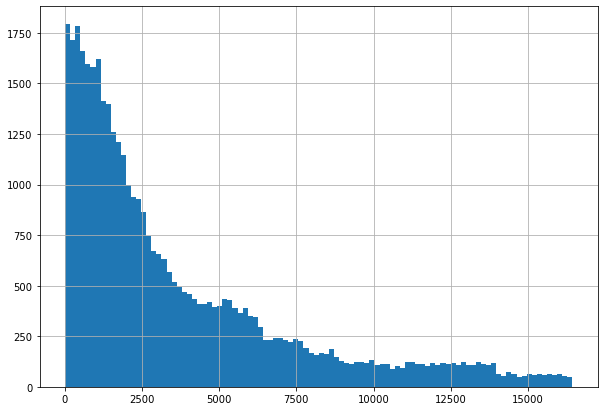

In [30]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

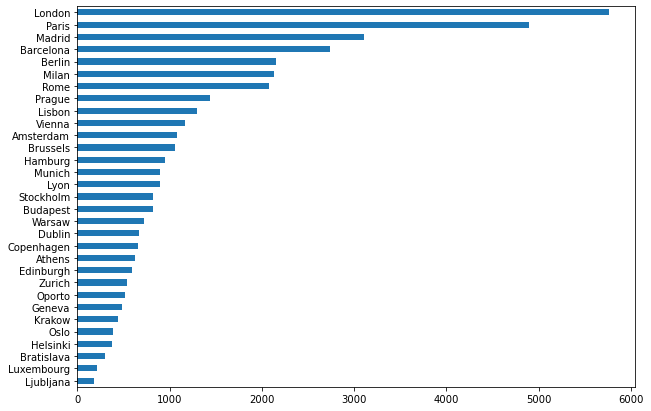

In [31]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

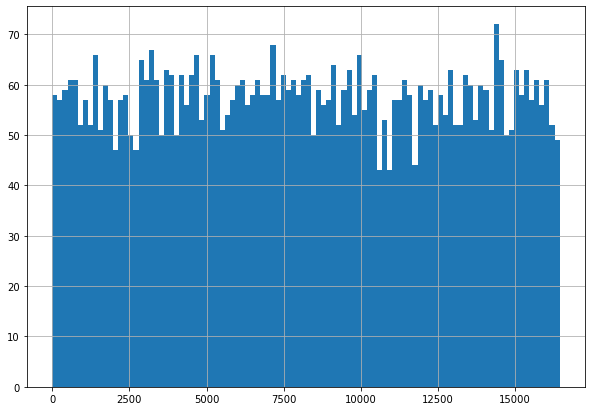

In [32]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

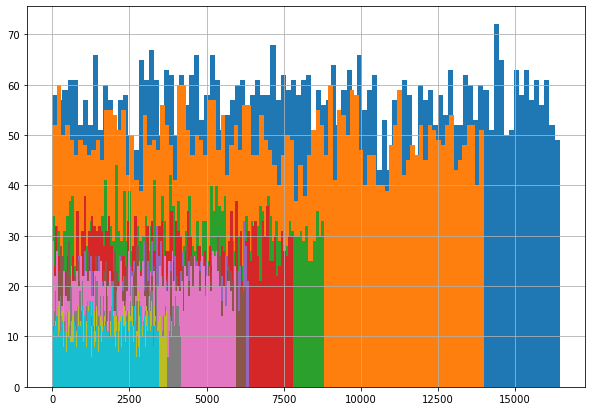

In [33]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Создаем признак, "нормализовав" место ресторана в городе

In [34]:
df['norm_gorod'] = df['Ranking'] / df['Rank_max'] # Делим место города на количество ресторанов в городе

### Посмотрим распределение целевой переменной

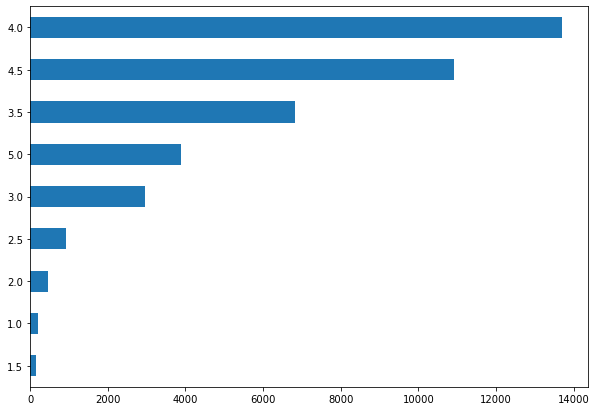

In [35]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

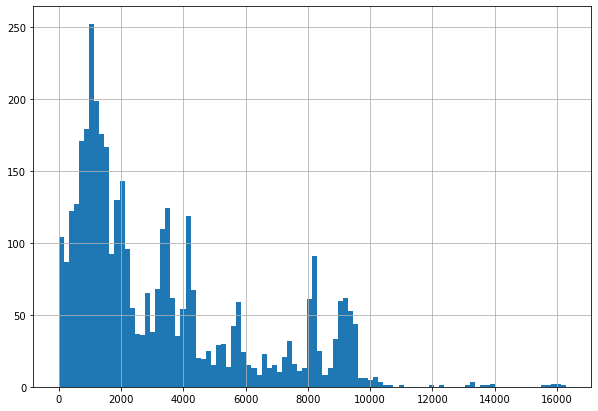

In [36]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

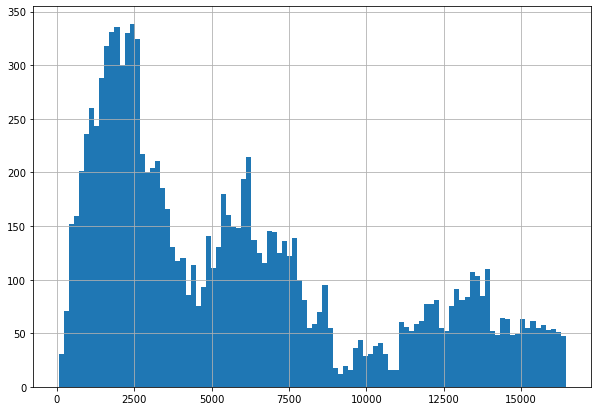

In [37]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### корреляция признаков

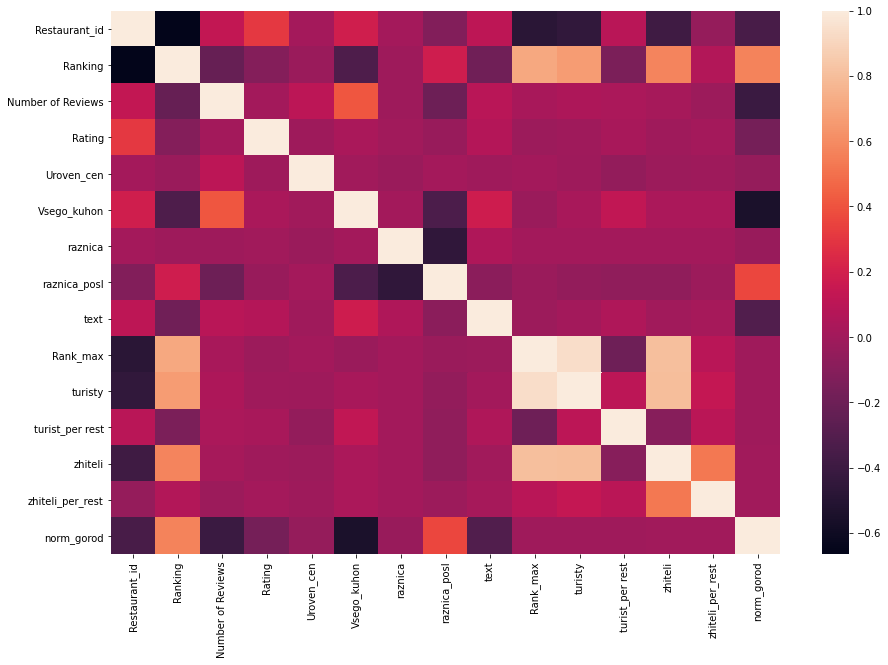

In [38]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df.drop(['sample'], axis=1).corr(),)

# Dummy-переменные

Создадим dummy-переменные из оставшихся видов кухонь

In [39]:
vidy_kuhon = df['kuhni'].str.get_dummies(', ')
df = pd.concat([df, vidy_kuhon], axis=1)

# Data Preprocessing

In [40]:
df.drop(['City', 'Cuisine Style','Price Range','Reviews','URL_TA','ID_TA','first_date', 'kuhni', 'second_date',
           'daty','first_norm_data','second_norm_data', 'Rank_max','turisty','zhiteli'], axis=1, inplace=True, errors='ignore')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            50000 non-null  int64  
 1   Ranking                  50000 non-null  float64
 2   Number of Reviews        50000 non-null  float64
 3   sample                   50000 non-null  int64  
 4   Rating                   50000 non-null  float64
 5   Uroven_cen               50000 non-null  int64  
 6   Vsego_kuhon              50000 non-null  int64  
 7   raznica                  50000 non-null  int64  
 8   raznica_posl             50000 non-null  int64  
 9   text                     50000 non-null  int64  
 10  turist_per rest          50000 non-null  float64
 11  zhiteli_per_rest         50000 non-null  float64
 12  norm_gorod               50000 non-null  float64
 13  "'American'"             50000 non-null  int64  
 14  "'Asian'"             

In [42]:
df.corr()

,Restaurant_id,Ranking,Number of Reviews,sample,Rating,Uroven_cen,Vsego_kuhon,raznica,raznica_posl,text,...,"""'Pizza'""","""'Portuguese'""","""'Pub'""","""'Seafood'""","""'Spanish'""","""'Sushi'""","""'Vegan Options'""","""'Vegetarian Friendly'""",'Neizvestnoe','Ostalnoe'
Restaurant_id,1.000000,-0.665311,0.128607,0.228320,0.304113,0.015425,0.189105,0.011252,-0.112805,0.112899,...,0.028755,0.054971,0.002458,0.046350,0.008097,0.003713,0.122014,0.176026,-0.086889,0.105399
Ranking,-0.665311,1.000000,-0.223077,0.006271,-0.109897,-0.026334,-0.322408,-0.009251,0.186595,-0.186507,...,-0.039910,-0.087233,-0.011064,-0.075019,-0.017153,-0.016536,-0.216514,-0.299214,0.150058,-0.170735
Number of Reviews,0.128607,-0.223077,1.000000,0.002683,0.011006,0.107821,0.409218,-0.008773,-0.203274,0.091027,...,0.067548,0.029854,0.002245,0.129134,0.052394,0.006650,0.323157,0.365970,-0.201299,0.098521
sample,0.228320,0.006271,0.002683,1.000000,0.936543,-0.003419,-0.003202,-0.000134,-0.003907,-0.003428,...,0.009286,-0.000305,0.000543,0.000684,0.006544,-0.001192,-0.009640,-0.003094,0.001303,-0.005373
Rating,0.304113,-0.109897,0.011006,0.936543,1.000000,-0.012176,0.034506,0.000702,-0.032546,0.073738,...,-0.001764,0.006840,0.002297,0.004679,-0.002147,-0.007682,0.029015,0.037317,-0.010781,0.025677
Uroven_cen,0.015425,-0.026334,0.107821,-0.003419,-0.012176,1.000000,0.002816,-0.024830,0.015277,-0.004042,...,-0.083239,-0.046254,-0.048543,0.065094,0.007876,0.028294,-0.009134,0.016919,0.157392,-0.070438
Vsego_kuhon,0.189105,-0.322408,0.409218,-0.003202,0.034506,0.002816,1.000000,0.006683,-0.331398,0.176568,...,0.172933,0.067744,0.206041,0.182103,0.089345,0.106461,0.557174,0.691530,-0.489476,0.452011
raznica,0.011252,-0.009251,-0.008773,-0.000134,0.000702,-0.024830,0.006683,1.000000,-0.451194,0.051883,...,0.003314,0.004780,0.000561,0.012270,-0.000107,0.017867,-0.011139,-0.004256,-0.046971,0.018589
raznica_posl,-0.112805,0.186595,-0.203274,-0.003907,-0.032546,0.015277,-0.331398,-0.451194,1.000000,-0.081062,...,-0.031643,-0.038851,-0.072187,-0.046386,-0.006647,0.001066,-0.197724,-0.302132,0.155707,-0.112538
text,0.112899,-0.186507,0.091027,-0.003428,0.073738,-0.004042,0.176568,0.051883,-0.081062,1.000000,...,0.017706,0.014783,0.005197,0.033498,0.010344,0.002708,0.120149,0.180794,-0.114778,0.075011


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            50000 non-null  int64  
 1   Ranking                  50000 non-null  float64
 2   Number of Reviews        50000 non-null  float64
 3   sample                   50000 non-null  int64  
 4   Rating                   50000 non-null  float64
 5   Uroven_cen               50000 non-null  int64  
 6   Vsego_kuhon              50000 non-null  int64  
 7   raznica                  50000 non-null  int64  
 8   raznica_posl             50000 non-null  int64  
 9   text                     50000 non-null  int64  
 10  turist_per rest          50000 non-null  float64
 11  zhiteli_per_rest         50000 non-null  float64
 12  norm_gorod               50000 non-null  float64
 13  "'American'"             50000 non-null  int64  
 14  "'Asian'"             

In [44]:
# Теперь выделим тестовую часть
train_data = df.query('sample == 1').drop(['sample'], axis=1)
test_data = df.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [45]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [46]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 38), (40000, 38), (40000, 37), (32000, 37), (8000, 37))

# Model 
Сам ML

In [47]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [48]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [49]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [50]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.201175


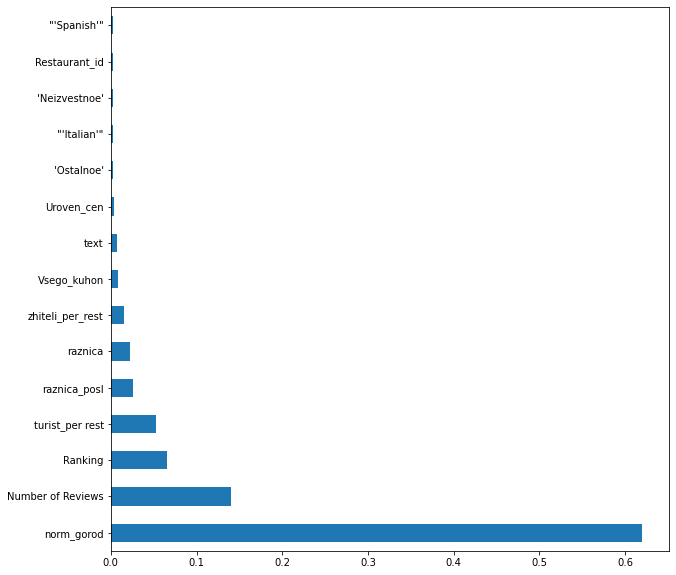

In [51]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Что можно было сделать, чтоб улучшить результат:
* Я никак не парсил сайт трипадвизора, потому что не умею.
* Не разобрался когда надо делать dummy-переменные, у меня получается что они либо никак не влияют, либо влияют мало
* Почему-то у меня получилось, что признаки, которые коррелируют с переменной достаточно сильно, на модель влияют слабо
